# ITS307 Data Analytics : Autumn Semester 2022

# Lecture 3

# Data Wrangling with pandas


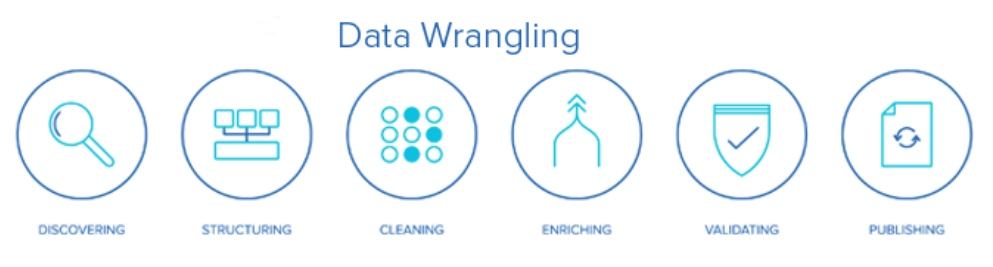

# 1. Duplicated data

## <font color="green">1.1 Check Duplicates records

`DataFrame.duplicated(subset=None, keep='first')`

In [2]:
#load data and check if your data contain any duplicates
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel("yelp.xlsx")
df.head()

name   category_0       category_1  take_out  \
0  China Sea Chinese Restaurant  Restaurants          Chinese      True   
1          Discount Tire Center        Tires       Automotive     False   
2                  Frankfurters  Restaurants         Hot Dogs      True   
3             Fred Dietz Floral     Shopping  Flowers & Gifts     False   
4                 Kuhn's Market         Food          Grocery     False   

   review_count  stars  city_id  state_id  
0          11.0    2.5        1         1  
1          24.0    4.5        1         1  
2           3.0    4.5        1         1  
3           6.0    4.0        1         1  
4           8.0    3.5        1         1

In [5]:
df.duplicated().sum()

0

In [8]:
#Use subset parameters to check if there is any duplicate business name
df.duplicated(subset=['name','take_out']).sum()


27

## <font color="green">1.2. Drup Duplicates
    
`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

In [9]:
# use drop_duplicates() method to drop all duplicate business names

df.drop_duplicates(subset=['name'],keep='first',inplace=True)
df.shape

(566, 8)

# 2. Missing Values

##  <font color=green>2.1. Check Missing values
    
`DataFrame.isna()` or `DataFrame.isnull()` Detect missing values.
    
    
Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values

In [22]:
# Use isna() and isnull() method to check null values in dataframe

df.isna().sum()

name            0
category_0      0
category_1      0
take_out        0
review_count    3
stars           2
city_id         0
state_id        0
dtype: int64

#### <font color=red> Question 1: Which columns contains missing values? Mention how many record are missing in each columns.

In [23]:
## Write your answer here

## <font color=green>2.2. Handle Missing Values
    
- Remove Missing values if your number of records with missing values are less.
    
    
- Source Missing information manually.
    
    
- Imputation - imputation is the process of replacing missing data with substituted values. 
    
    `Note: Use either pandas or sklearn to perform imputation`

### <font color=blue>2.2.1. Using pandas for Imputation
    
`DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)`

In [24]:
# Use fillna() method to fill null values with 0. 
fdf = df.fillna(0)
fdf.isna().sum()

name            0
category_0      0
category_1      0
take_out        0
review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

In [26]:
#Check if you have any more null values
bdf = df.fillna(method="bfill")
bdf.isna().sum()


name            0
category_0      0
category_1      0
take_out        0
review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

`DataFrame.ffill(axis=None, inplace=False, limit=None, downcast=None)` - Synonym for DataFrame.fillna() with method='ffill

`DataFrame.bfill(axis=None, inplace=False, limit=None, downcast=None)` - Synonym for DataFrame.fillna() with method='bfill

### <font color = blue>2.2.2. Using sklearn for Imputation
    
`class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)`

`DataFrame.select_dtypes(include=None, exclude=None)`

In [34]:
df.dtypes

name             object
category_0       object
category_1       object
take_out           bool
review_count    float64
stars           float64
city_id           int64
state_id          int64
dtype: object

In [37]:
ndf = df.select_dtypes(include=['float64','int64'])
ndf.head()

review_count  stars  city_id  state_id
0          11.0    2.5        1         1
1          24.0    4.5        1         1
2           3.0    4.5        1         1
3           6.0    4.0        1         1
4           8.0    3.5        1         1

In [36]:
odf = df.select_dtypes(include=['object','bool'])
odf.head()

name   category_0       category_1  take_out
0  China Sea Chinese Restaurant  Restaurants          Chinese      True
1          Discount Tire Center        Tires       Automotive     False
2                  Frankfurters  Restaurants         Hot Dogs      True
3             Fred Dietz Floral     Shopping  Flowers & Gifts     False
4                 Kuhn's Market         Food          Grocery     False

In [38]:
from sklearn.impute import SimpleImputer
imputeN = SimpleImputer()
ndata = imputeN.fit_transform(ndf)
ndata

array([[11. ,  2.5,  1. ,  1. ],
       [24. ,  4.5,  1. ,  1. ],
       [ 3. ,  4.5,  1. ,  1. ],
       ...,
       [ 3. ,  1.5, 13. ,  2. ],
       [ 9. ,  4. , 13. ,  2. ],
       [ 4. ,  1. , 13. ,  2. ]])

In [40]:
#Convert back to dataframe and  check
numdf = pd.DataFrame(ndata,columns=ndf.columns)
numdf.isna().sum()

review_count    0
stars           0
city_id         0
state_id        0
dtype: int64

In [27]:
#Use simpleImputer to impute missing values




# 3. Type Conversion

`DataFrame.astype(dtype, copy=True, errors='raise')`

`Series.astype(dtype, copy=True, errors='raise')`

In [38]:
# Use dataframe astype method and series astype methods to convert column type to another type.

